### Install and Import Dependencies

In [1]:
!pip install easyocr
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


     ---------------------------------------- 2.9/2.9 MB 7.0 MB/s eta 0:00:00
     --------------------------------------- 35.0/35.0 MB 13.9 MB/s eta 0:00:00
     --------------------------------------- 23.9/23.9 MB 18.7 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 21.9 MB/s eta 0:00:00
     ---------------------------------------- 95.1/95.1 kB ? eta 0:00:00
     ------------------------------------- 313.0/313.0 kB 18.9 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 10.2 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 17.9 MB/s eta 0:00:00
     ---------------------------------------- 219.4/219.4 kB ? eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 16.6 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0
  Attempting uninstall: networkx
    Found existing installation:

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25858 sha256=4662392ff06ac6bf76cfea061b94ff7f370321af1f163b55e943cab33b3aada5
  Stored in directory: C:\Users\shrey\AppData\Local\Temp\pip-ephem-wheel-cache-b79chg83\wheels\4b\a5\2d\4a070a801d3a3d93f033d3ee9728f470f514826e89952df3ea
Successfully built imutils


In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import easyocr

### Read in Image, Grayscale and Blur

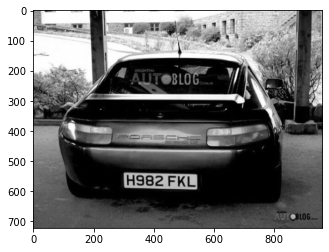

In [44]:
img = cv2.imread('image4.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

### Apply filter and find edges for localization

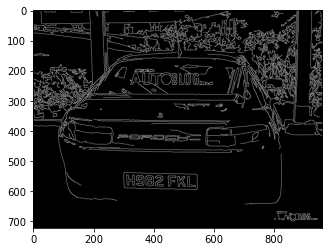

In [45]:
bfilter = cv2.bilateralFilter(gray,11,17,17) #Noise Reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge Dtection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

### Find Contours and Apply Mask

In [46]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea,reverse=True)[:10]

In [47]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour,10,True)
    if len(approx) == 4:
        location = approx
        break

In [48]:
location

array([[[300, 540]],

       [[306, 589]],

       [[543, 592]],

       [[538, 543]]], dtype=int32)

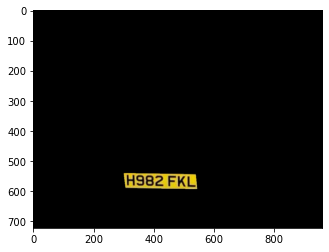

In [49]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask,[location],0,255,-1)
new_image = cv2.bitwise_and(img,img,mask=mask)
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [50]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x),np.min(y))
(x2,y2) = (np.max(x),np.max(y))
cropped_image = gray[x1:x2+1,y1:y2+1]

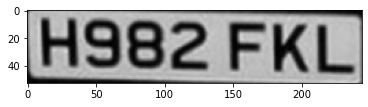

In [51]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

### Use Easy OCR To Read Text

In [52]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[0, 0], [244, 0], [244, 53], [0, 53]], 'H982 FKL', 0.9758458337396507)]

### Render Result

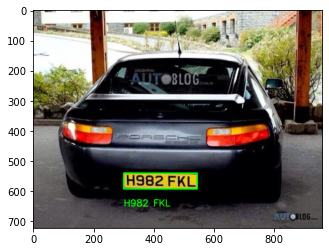

In [53]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img,text=text,org=(approx[0][0][0],approx[1][0][1]+60),fontFace=font,fontScale=1,color=(0,255,0),thickness=2,lineType=cv2.LINE_AA)
res = cv2.rectangle(img,tuple(approx[0][0]),tuple(approx[2][0]),(0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))